In [498]:
import pandas as pd

columns = ['unit_number', 'cycle_time', 'ops1', 'ops2', 'ops3'] + [f'msr{i}' for i in range(1, 27)]

ft_path = './CMaps/train_FD001.txt'

features = pd.read_csv(ft_path, sep=' ', decimal='.', header=None, names=columns, engine='python')
features = features.dropna(axis=1, how='all')

print(features.shape)
features.head(10)

(20631, 26)


,unit_number,cycle_time,ops1,ops2,ops3,msr1,msr2,msr3,msr4,msr5,...,msr12,msr13,msr14,msr15,msr16,msr17,msr18,msr19,msr20,msr21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [499]:
unique_unit_numbers = features['unit_number'].nunique()
max_cycle_time_per_unit = features.groupby('unit_number')['cycle_time'].max()
descriptive_stats = features.drop(['unit_number', 'cycle_time'], axis=1).describe().T
additional_stats = features.drop(['unit_number', 'cycle_time'], axis=1).agg(['median', 'std']).T
stats = pd.concat([descriptive_stats, additional_stats[['median', 'std']]], axis=1)
quartiles = features.drop(['unit_number', 'cycle_time'], axis=1).quantile([0.25, 0.5, 0.75]).T
quartiles.columns = ['25%', '50%', '75%']
final_stats = pd.concat([stats, quartiles], axis=1)

print(f"Number of unique unit numbers: {unique_unit_numbers}")
print("Max cycle time for each unit number:\n", max_cycle_time_per_unit)
print("Descriptive statistics of features:\n", final_stats)

Number of unique unit numbers: 100
Max cycle time for each unit number:
 unit_number
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: cycle_time, Length: 100, dtype: int64
Descriptive statistics of features:
          count         mean           std        min        25%        50%  \
ops1   20631.0    -0.000009  2.187313e-03    -0.0087    -0.0015     0.0000   
ops2   20631.0     0.000002  2.930621e-04    -0.0006    -0.0002     0.0000   
ops3   20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
msr1   20631.0   518.670000  0.000000e+00   518.6700   518.6700   518.6700   
msr2   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
msr3   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
msr4   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
msr5   20631.0    14.620000  1.776400e-15    14.6200    14.6200    14.6200   
msr6   2063

In [500]:
tg_path = './CMaps/RUL_FD001.txt'
targets = pd.read_csv(tg_path, header=None, names=['RUL'], engine='python')
targets = targets.dropna(axis=1, how='all')

targets.insert(0, 'idx', range(1, len(targets) + 1))

print(targets.shape)
print(targets.describe())

print(targets.head(10))

(100, 2)
              idx        RUL
count  100.000000  100.00000
mean    50.500000   75.52000
std     29.011492   41.76497
min      1.000000    7.00000
25%     25.750000   32.75000
50%     50.500000   86.00000
75%     75.250000  112.25000
max    100.000000  145.00000
   idx  RUL
0    1  112
1    2   98
2    3   69
3    4   82
4    5   91
5    6   93
6    7   91
7    8   95
8    9  111
9   10   96


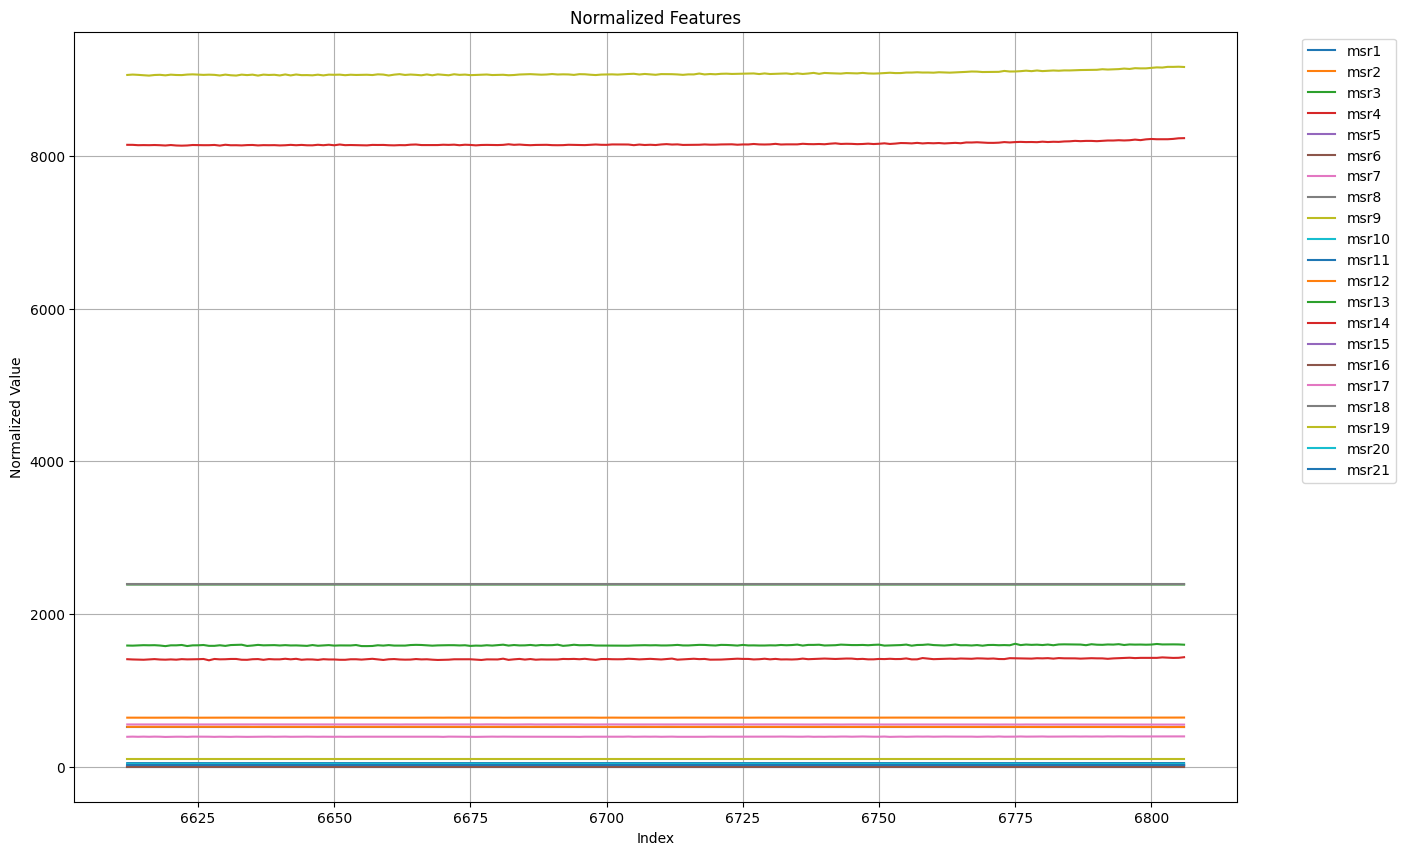

In [501]:
import matplotlib.pyplot as plt

cols_norm = [f'msr{i}' for i in range(1, 22)]

plt.figure(figsize=(15, 10))

limited_features = features[features['unit_number'] == 34]

for feature in cols_norm:
    plt.plot(limited_features[feature], label=feature)

plt.title('Normalized Features')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [502]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['ops1', 'ops2', 'ops3'] + [f'msr{i}' for i in range(1, 22)]
scaler = MinMaxScaler()
features[features_to_normalize] = scaler.fit_transform(features[features_to_normalize])

features.head()

,unit_number,cycle_time,ops1,ops2,ops3,msr1,msr2,msr3,msr4,msr5,...,msr12,msr13,msr14,msr15,msr16,msr17,msr18,msr19,msr20,msr21
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502


In [ ]:
# GRU

In [503]:
from sklearn.model_selection import train_test_split

unique_units = features['unit_number'].unique()

units_train, units_test = train_test_split(unique_units, test_size=0.2, random_state=42)

features_train = features[features['unit_number'].isin(units_train)]
features_test = features[features['unit_number'].isin(units_test)]
targets_train = targets[targets['idx'].isin(units_train)]
targets_test = targets[targets['idx'].isin(units_test)]

# Reset the indices to ensure they are consistent
features_train = features_train.reset_index(drop=True)
features_test = features_test.reset_index(drop=True)
targets_train = targets_train.reset_index(drop=True)
targets_test = targets_test.reset_index(drop=True)

print(targets_test.head())

temps_train = targets_train.copy()
temps_test = targets_test.copy()

targets_train = targets_train.drop(columns=['idx'])
targets_test = targets_test.drop(columns=['idx'])

print(targets_test.head())

   idx  RUL
0    1  112
1    5   91
2   11   97
3   13   95
4   19   87
   RUL
0  112
1   91
2   97
3   95
4   87


In [504]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

# TimeSeries
class TimeSeriesDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
        self.unit_numbers = features['unit_number'].unique()
        self.scalers = {unit: StandardScaler() for unit in self.unit_numbers}

    def __len__(self):
        return len(self.unit_numbers)

    def __getitem__(self, idx):
        unit_number = self.unit_numbers[idx]
        unit_data = self.features[self.features['unit_number'] == unit_number]
        unit_data = unit_data.drop(columns=['unit_number']).values
        scaler = self.scalers[unit_number]
        unit_data = scaler.fit_transform(unit_data)
        target = self.targets.iloc[idx].values
        return torch.tensor(unit_data, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

def collate_fn(batch):
    inputs = [item[0] for item in batch]
    targets = torch.stack([item[1] for item in batch])
    lengths = [len(seq) for seq in inputs]
    padded_inputs = torch.nn.utils.rnn.pad_sequence(inputs, batch_first=True)
    return padded_inputs, targets, lengths


In [505]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, lengths):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        packed_input = torch.nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        packed_output, _ = self.gru(packed_input, h0)
        output, _ = torch.nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)
        lengths = lengths.clone().detach()
        out = self.fc(output[range(len(output)), lengths-1])
        return out


Epoch [1/200], Loss: 7899.8407
Epoch [11/200], Loss: 7100.8978
Epoch [21/200], Loss: 6774.0324
Epoch [31/200], Loss: 6482.3003
Epoch [41/200], Loss: 6211.9559
Epoch [51/200], Loss: 5957.6265
Epoch [61/200], Loss: 5716.8324
Epoch [71/200], Loss: 5488.1709
Epoch [81/200], Loss: 5270.7121
Epoch [91/200], Loss: 5063.7700
Epoch [101/200], Loss: 4866.7951
Epoch [111/200], Loss: 4679.3239
Epoch [121/200], Loss: 4500.9482
Epoch [131/200], Loss: 4331.2983
Epoch [141/200], Loss: 4170.0334
Epoch [151/200], Loss: 4016.8330
Epoch [161/200], Loss: 3871.3925
Epoch [171/200], Loss: 3733.4208
Epoch [181/200], Loss: 3602.6383
Epoch [191/200], Loss: 3478.7737


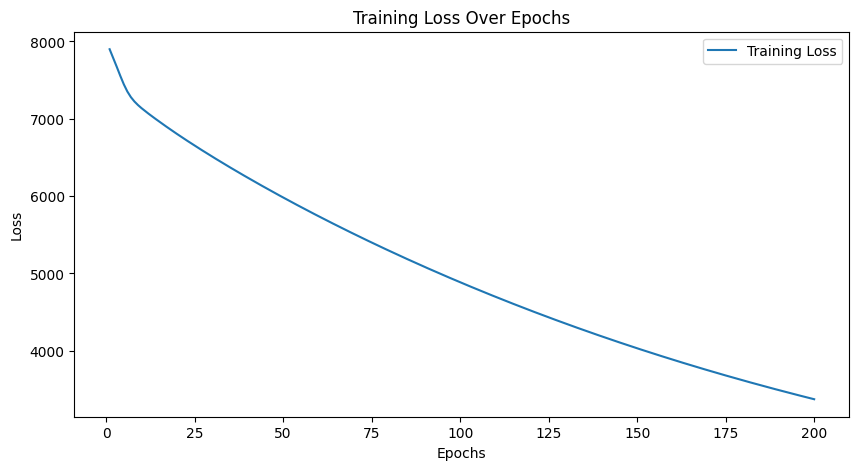

In [430]:
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    loss_history = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for inputs, targets, lengths in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            lengths = torch.tensor(lengths, device=device).clone().detach()
            optimizer.zero_grad()
            outputs = model(inputs, lengths)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(train_loader)
        loss_history.append(avg_loss)
        if epoch % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return loss_history

train_dataset = TimeSeriesDataset(features_train, targets_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = features_train.shape[1] - 1  # excluding 'unit_number'
hidden_size = 64
output_size = 1
num_layers = 2
num_epochs = 200
learning_rate = 0.001

model = GRUModel(input_size, hidden_size, output_size, num_layers).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_history = train_model(model, train_loader, criterion, optimizer, num_epochs)

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


In [431]:
def predict(model, test_loader):
    model.eval()
    predictions = []
    true_values = []
    with torch.no_grad():
        for inputs, targets, lengths in test_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            lengths = torch.tensor(lengths, device=device).clone().detach()
            outputs = model(inputs, lengths)
            predictions.append(outputs.cpu().numpy())
            true_values.append(targets.cpu().numpy())
    return np.concatenate(predictions), np.concatenate(true_values)

# Define test_dataset and test_loader
test_dataset = TimeSeriesDataset(features_test, targets_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

# Generate predictions
predictions, true_values = predict(model, test_loader)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(true_values, predictions)
mae = mean_absolute_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

targets_train = targets_train.drop(columns=['idx'])
targets_test = targets_test.drop(columns=['idx'])

Mean Squared Error (MSE): 2682.6885
Mean Absolute Error (MAE): 43.8473
R-squared (R2): -0.6759


In [432]:
# Experiment 1: Hidden Size Tinkering

Epoch [1/200], Loss: 7859.0342
Epoch [11/200], Loss: 6669.6929
Epoch [21/200], Loss: 6112.3695
Epoch [31/200], Loss: 5618.5604
Epoch [41/200], Loss: 5175.6134
Epoch [51/200], Loss: 4776.1629
Epoch [61/200], Loss: 4415.6830
Epoch [71/200], Loss: 4090.7847
Epoch [81/200], Loss: 3798.6202
Epoch [91/200], Loss: 3536.6443
Epoch [101/200], Loss: 3302.5090
Epoch [111/200], Loss: 3094.0068
Epoch [121/200], Loss: 2909.0456
Epoch [131/200], Loss: 2745.6352
Epoch [141/200], Loss: 2601.8810
Epoch [151/200], Loss: 2475.9821
Epoch [161/200], Loss: 2366.2312
Epoch [171/200], Loss: 2271.0154
Epoch [181/200], Loss: 2188.8180
Epoch [191/200], Loss: 2118.2207


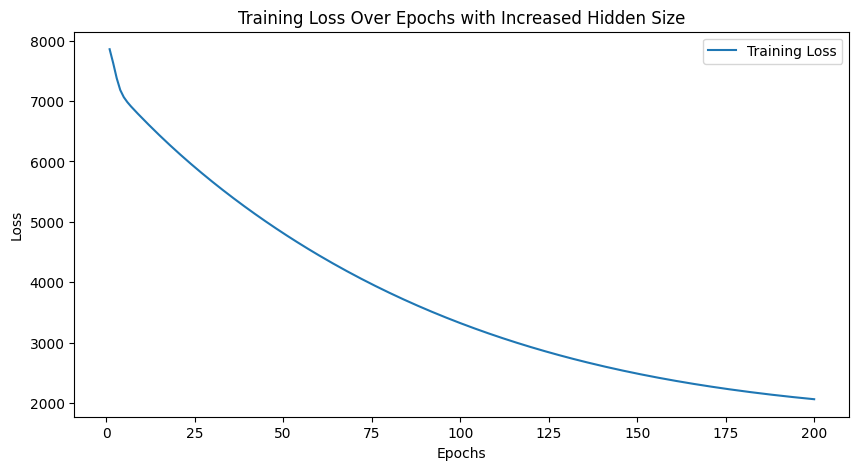

Mean Squared Error (MSE): 1701.8793
Mean Absolute Error (MAE): 37.8907
R-squared (R2): -0.0632


In [433]:
hidden_size = 128  # Previously 64

# Define and train the model with new hidden size
model = GRUModel(input_size, hidden_size, output_size, num_layers).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_history = train_model(model, train_loader, criterion, optimizer, num_epochs)

# Plot the loss history
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs with Increased Hidden Size')
plt.legend()
plt.show()

# Evaluate the model
predictions, true_values = predict(model, test_loader)
mse = mean_squared_error(true_values, predictions)
mae = mean_absolute_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

In [434]:
# Experiment 2: Number of Layers Tinkering

Epoch [1/200], Loss: 7875.6146
Epoch [11/200], Loss: 6596.8390
Epoch [21/200], Loss: 6045.8009
Epoch [31/200], Loss: 5556.3766
Epoch [41/200], Loss: 5117.5858
Epoch [51/200], Loss: 4722.1519
Epoch [61/200], Loss: 4365.5559
Epoch [71/200], Loss: 4044.4169
Epoch [81/200], Loss: 3755.8832
Epoch [91/200], Loss: 3497.4055
Epoch [101/200], Loss: 3266.6269
Epoch [111/200], Loss: 3061.3331
Epoch [121/200], Loss: 2879.4244
Epoch [131/200], Loss: 2718.9045
Epoch [141/200], Loss: 2577.8738
Epoch [151/200], Loss: 2454.5269
Epoch [161/200], Loss: 2347.1541
Epoch [171/200], Loss: 2254.1417
Epoch [181/200], Loss: 2173.9737
Epoch [191/200], Loss: 2105.2337


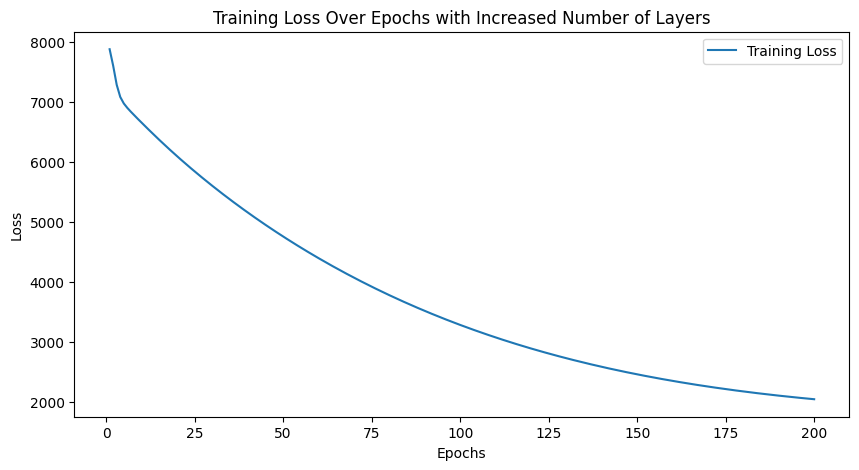

Mean Squared Error (MSE): 1695.2728
Mean Absolute Error (MAE): 37.8573
R-squared (R2): -0.0591


In [435]:
# Increase the number of layers
num_layers = 3  # Previously 2

# Define and train the model with new number of layers
model = GRUModel(input_size, hidden_size, output_size, num_layers).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_history = train_model(model, train_loader, criterion, optimizer, num_epochs)

# Plot the loss history
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs with Increased Number of Layers')
plt.legend()
plt.show()

# Evaluate the model
predictions, true_values = predict(model, test_loader)
mse = mean_squared_error(true_values, predictions)
mae = mean_absolute_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

In [436]:
# Experiment 3: Learning Rate Tinkering

In [506]:
# Adjust the learning rate
learning_rate = 0.01  # Previously 0.001

# Define and train the model with new learning rate
model = GRUModel(input_size, hidden_size, output_size, num_layers).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_history = train_model(model, train_loader, criterion, optimizer, num_epochs)

# Plot the loss history
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs with Adjusted Learning Rate')
plt.legend()
plt.show()

# Evaluate the model
predictions, true_values = predict(model, test_loader)
mse = mean_squared_error(true_values, predictions)
mae = mean_absolute_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

KeyError: 15804

In [447]:
# CNN

In [496]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

class PaddedTimeSeriesDataset(Dataset):
    def __init__(self, features, targets):
        self.features = [torch.tensor(f, dtype=torch.float32) for f in features]
        self.targets = torch.tensor(targets, dtype=torch.float32)
        self.padded_features = self.pad_sequence(self.features)

    def pad_sequence(self, sequences):
        max_len = max([len(seq) for seq in sequences])
        padded_sequences = torch.zeros((len(sequences), max_len, sequences[0].shape[1]))
        for i, seq in enumerate(sequences):
            padded_sequences[i, :len(seq), :] = seq
        return padded_sequences

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        x = self.padded_features[idx]
        y = self.targets[idx]
        return x.unsqueeze(0), y

# Assuming `features_train`, `features_test`, `targets_train`, `targets_test` are numpy arrays
train_dataset = PaddedTimeSeriesDataset(features_train, targets_train)
test_dataset = PaddedTimeSeriesDataset(features_test, targets_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



TypeError: new(): invalid data type 'str'

In [488]:
class CNNTimeSeries(nn.Module):
    def __init__(self):
        super(CNNTimeSeries, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=(3, 3), padding=(1, 1))
        self.pool = nn.MaxPool2d((2, 2))
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(3, 3), padding=(1, 1))
        self.fc1 = nn.Linear(32 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 1)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 4 * 4)  # Adjust the dimensions based on your data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNNTimeSeries()


In [489]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.unsqueeze(1)  # Add a channel dimension

        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

print('Finished Training')


KeyError: 8517

IndexError: index 6032 is out of bounds for axis 0 with size 80

In [ ]:
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

print(f"Test Loss: {test_loss/len(test_loader)}")
